<a href="https://colab.research.google.com/github/jeremyjcheng/SPIS-final-project-2023/blob/main/CasaCrawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! rm -rf "SPIS Training Images"

In [ ]:
! gdown  1uX3_nPqkIqsu474VgHAGh1jsX47PZmVb
! unzip "SPIS_Images.zip" -d .
! gdown 1-VGolXn9FI6Ro9_AChu77d5pYS4xX7gX

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Preprocessing
data = pd.read_csv("Toronto_Apartments.csv")
data.head(11)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:
11 Brunel Ct, Toronto, ON M5V 3Y3, Canada $3,150.00 2 2


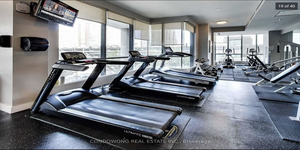

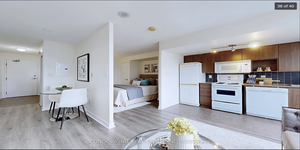

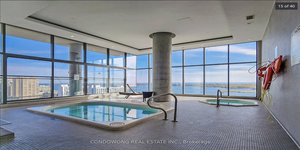

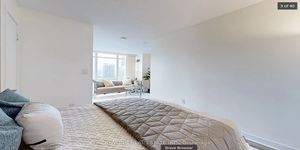

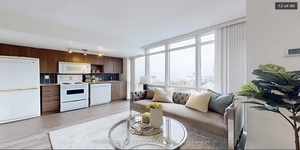

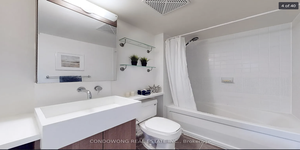

Do you like this house (y/n)? y
12 Yonge St, Toronto, ON M5E 1Z9, Canada $3,200.00 2 2


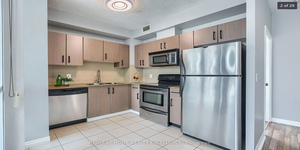

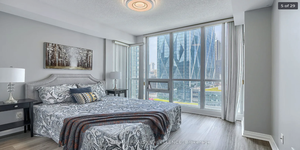

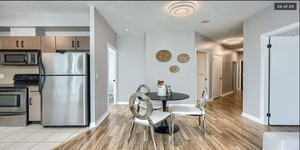

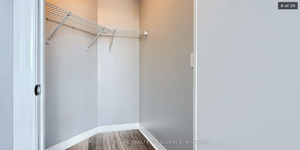

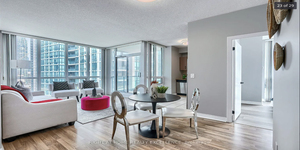

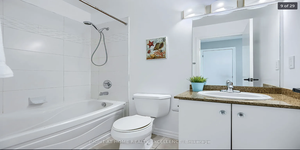

Do you like this house (y/n)? n
438 Richmond St W, Toronto, ON M5V 1X9, Canada $2,500.00 1 1


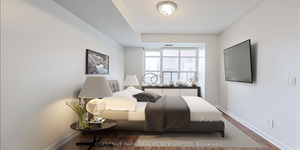

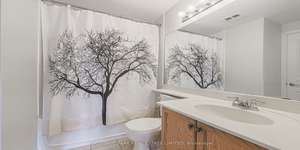

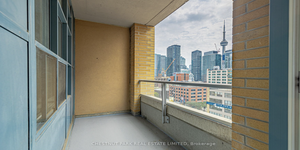

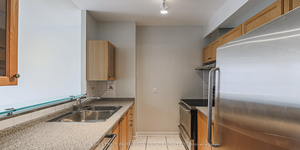

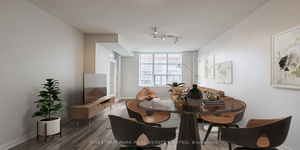

Do you like this house (y/n)? y
12 York St, Toronto, ON M5J 2Z2, Canada $2,400.00 1 1


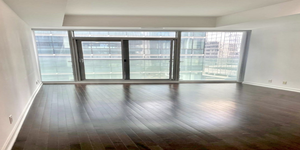

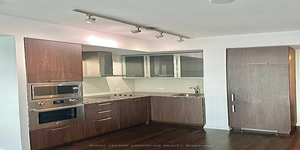

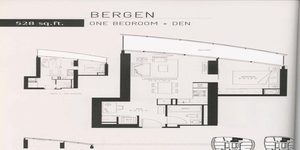

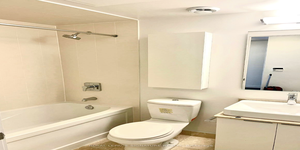

Do you like this house (y/n)? n
3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada $1,900.00 1 1


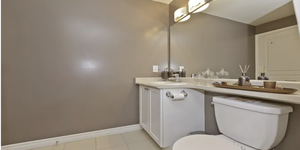

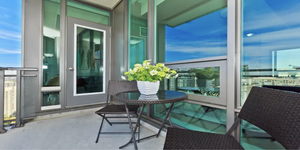

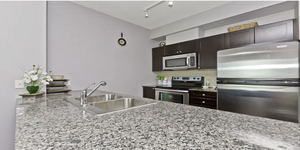

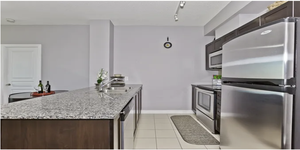

Do you like this house (y/n)? y
168 Simcoe St, Toronto, ON M5H 4C9, Canada $3,600.00 2 2


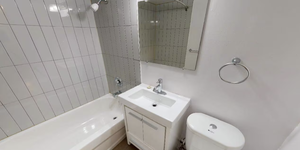

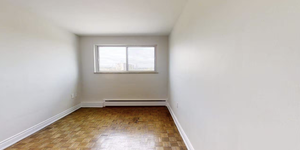

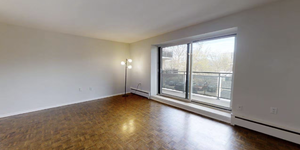

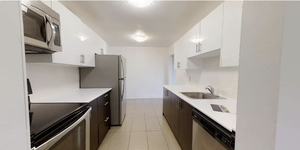

Do you like this house (y/n)? n
70 Temperance St, M5H4E8, Toronto, ON $3,000.00 2 2


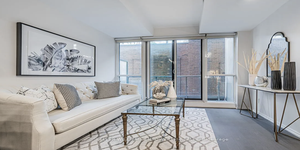

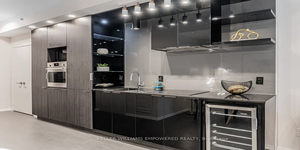

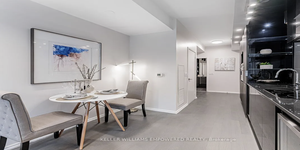

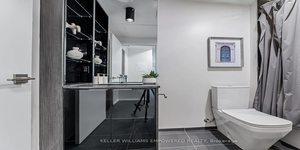

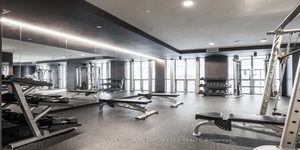

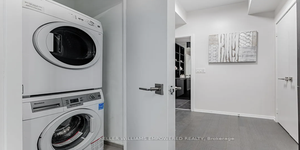

Do you like this house (y/n)? y
700 Ross st, L7S 1S2, Burlington, ON $1,600.00 2 1


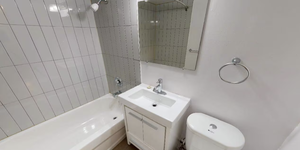

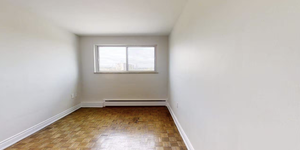

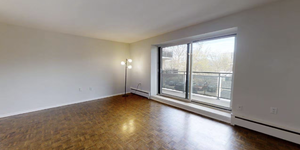

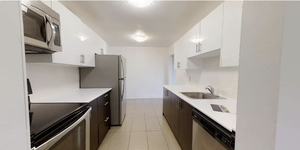

Do you like this house (y/n)? n
10 Capreol Ct, Toronto, ON M5V 4B3, Canada $2,200.00 1 1


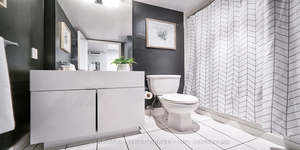

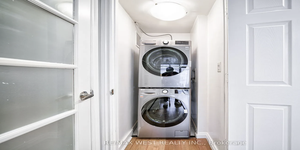

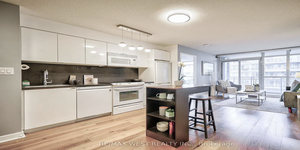

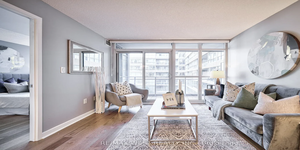

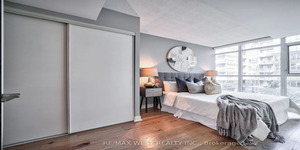

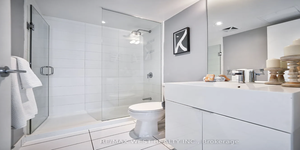

Do you like this house (y/n)? y
5 Hanna Ave, Toronto, ON M6K 0B3, Canada $2,500.00 2 2


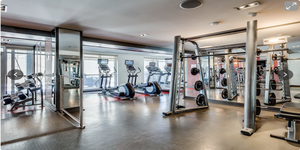

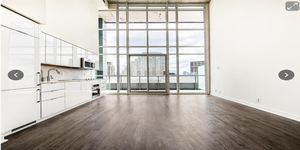

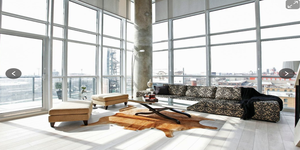

Do you like this house (y/n)? n
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [39]:
from PIL import Image
import os

Capreol_Ct = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.42.57 AM.png")
#display(Capreol_Ct)

Capreol_Image2 = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.43.37 AM.png")
#display(Capreol_Image2)

# for file in os.listdir("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada"):
#   filename = os.fsdecode(file)
#   if filename.endswith(".png"):
#     Capreol_Court = Image.open(os.path.join("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada", filename))
#     display(Capreol_Court)

# loop through rows of dataframe, take features and print, print text data, take image and run through display_address, input like or dislike, keep track of index if they like or not
def display_address(address):
  for file in os.listdir("/content/SPIS Training Images/" + address):
    filename = os.fsdecode(file)
    if filename.endswith(".png"):
      address_pictures = Image.open(os.path.join("/content/SPIS Training Images/" + address, filename))
      address_pictures = address_pictures.resize((300, 150), Image.Resampling.LANCZOS)
      display(address_pictures)

# display_address("11 Brunel Ct, Toronto, ON M5V 3Y3, Canada")
responses = []
print("Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:")
for index in range(len(data)):
  print(data.loc[index,"Address"], data.loc[index,"Price"], data.loc[index, "Bedroom"], data.loc[index, "Bathroom"])
  display_address(data.loc[index,"Address"])
  single_response = input("Do you like this house (y/n)? ")
  if single_response == "y":
    responses.append(1)
  if single_response == "n":
    responses.append(0)

print(responses)

data['Preference'] = responses #added preference column to dataframe

In [41]:
data.head(10)

Bedroom  Bathroom  Den                                          Address  \
0        2         2    0        11 Brunel Ct, Toronto, ON M5V 3Y3, Canada   
1        2         2    0         12 Yonge St, Toronto, ON M5E 1Z9, Canada   
2        1         1    0   438 Richmond St W, Toronto, ON M5V 1X9, Canada   
3        1         1    1          12 York St, Toronto, ON M5J 2Z2, Canada   
4        1         1    0  3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada   
5        2         2    0       168 Simcoe St, Toronto, ON M5H 4C9, Canada   
6        2         2    0            70 Temperance St, M5H4E8, Toronto, ON   
7        2         1    0             700 Ross st, L7S 1S2, Burlington, ON   
8        1         1    0       10 Capreol Ct, Toronto, ON M5V 4B3, Canada   
9        2         2    0         5 Hanna Ave, Toronto, ON M6K 0B3, Canada   

         Lat       Long   Price  Preference  
0  43.639406 -79.393232  3843.0           1  
1  43.643105 -79.375906  3904.0           0  
2  43.648005 -79.396834  3050.0           1  
3  43.641873 -79.381906  2928.0           0  
4  43.588602 -79.631700  2318.0           1  
5  43.650092 -79.387374  4392.0           0  
6  43.650560 -79.382072  3660.0           1  
7  43.328986 -79.808618  1952.0           0  
8  43.640223 -79.395951  2684.0           1  
9  43.637453 -79.418387  3050.0           0

In [40]:
def convertPriceToNumber(price_as_string):
  price_as_string = price_as_string.replace('$', '')
  price_as_string = price_as_string.replace(',', '')
  price_as_number = float(price_as_string)
  adjusted_price_as_number = price_as_number * 1.22
  return adjusted_price_as_number

data['Price'] = data['Price'].apply(convertPriceToNumber)

In [ ]:
Possible models for classifying preference of new listings:
KNeighborsClassifier (sk.learn)
MLPClassifier #Neural Networks
DecisionTreeClassifier

In [ ]:
data = pd.read_csv("Toronto_Apartments_Full.csv")
data.head(11)
# print(type(data))



In [42]:
#address = [3985 Grand Park Drive, 126 Simcoe str]
address = []
for addresses in data["Address"]:
  address.append(addresses)

bedroom = []
for bedrooms in data["Bedroom"]:
  bedroom.append(bedrooms)

bathroom = []
for bathrooms in data["Bathroom"]:
  bathroom.append(bathrooms)

print(address)
print(bedroom)
print(bathroom)

['11 Brunel Ct, Toronto, ON M5V 3Y3, Canada', '12 Yonge St, Toronto, ON M5E 1Z9, Canada', '438 Richmond St W, Toronto, ON M5V 1X9, Canada', '12 York St, Toronto, ON M5J 2Z2, Canada', '3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada', '168 Simcoe St, Toronto, ON M5H 4C9, Canada', '70 Temperance St, M5H4E8, Toronto, ON', '700 Ross st, L7S 1S2, Burlington, ON', '10 Capreol Ct, Toronto, ON M5V 4B3, Canada', '5 Hanna Ave, Toronto, ON M6K 0B3, Canada']
[2, 2, 1, 1, 1, 2, 2, 2, 1, 2]
[2, 2, 1, 1, 1, 2, 2, 1, 1, 2]


In [46]:
!pip install pillow
import requests
import urllib.request
from PIL import Image

url = "https://zillow56.p.rapidapi.com/photos"

querystring = {"zpid":"2110846380"}

headers = {
	"X-RapidAPI-Key": "578f87ec1bmsh0fb5cb0a4cc50c9p118285jsn2097afdbae29",
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())



{'photos': [{'caption': '', 'mixedSources': {'jpeg': [{'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_192.jpg', 'width': 192}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_384.jpg', 'width': 384}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_576.jpg', 'width': 576}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_768.jpg', 'width': 768}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_960.jpg', 'width': 960}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_1152.jpg', 'width': 1152}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_1344.jpg', 'width': 1344}, {'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e56944a1563-cc_ft_1536.jpg', 'width': 1536}], 'webp': [{'url': 'https://photos.zillowstatic.com/fp/4a08d2c4b87c933484501e

In [45]:
# importing modules
!pip install pillow
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png',
   "gfg.png")

img = Image.open("gfg.png")
img.show()